In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import spearmanr

In [2]:
# Load the data
file_path = "/Users/praveenpuviindran/Documents/Current Course Material/DATA481S25/lung_cancer_data.csv"
df = pd.read_csv(file_path)

# Display first few rows
df.head()

,Patient_ID,Age,Gender,Smoking_History,Tumor_Size_mm,Tumor_Location,Stage,Treatment,Survival_Months,Ethnicity,...,Alanine_Aminotransferase_Level,Aspartate_Aminotransferase_Level,Creatinine_Level,LDH_Level,Calcium_Level,Phosphorus_Level,Glucose_Level,Potassium_Level,Sodium_Level,Smoking_Pack_Years
0,Patient0000,68,Male,Current Smoker,81.678677,Lower Lobe,Stage III,Surgery,44,Hispanic,...,27.985571,46.801214,1.245849,239.240255,10.366307,3.547734,113.919243,4.968163,139.822861,17.006956
1,Patient0001,58,Male,Never Smoked,78.448272,Lower Lobe,Stage I,Radiation Therapy,101,Caucasian,...,30.120956,39.711531,1.463231,233.515237,10.081731,2.945020,101.321578,3.896795,135.449361,93.270893
2,Patient0002,44,Male,Former Smoker,67.714305,Lower Lobe,Stage I,Chemotherapy,69,African American,...,5.882418,32.640602,0.630109,169.037460,8.660892,4.637399,78.214177,4.369050,143.377155,70.348376
3,Patient0003,72,Male,Current Smoker,70.806008,Lower Lobe,Stage III,Chemotherapy,95,African American,...,38.908154,44.319393,0.594342,213.967590,8.832669,3.617098,127.895361,4.348474,138.586005,19.828128
4,Patient0004,37,Female,Never Smoked,87.272433,Lower Lobe,Stage IV,Radiation Therapy,105,Asian,...,26.344877,15.746906,1.478239,118.187543,9.247609,4.773255,148.801185,3.671976,141.230724,81.047456


In [3]:
# Summary Statistics
print(df.describe())

# Check Missing Values
missing_values = df.isnull().sum()
missing_values[missing_values > 0]

                Age  Tumor_Size_mm  Survival_Months  Performance_Status  \
count  23658.000000   23658.000000     23658.000000        23658.000000   
mean      54.439344      55.383736        59.863809            1.999915   
std       14.396386      26.004354        34.246042            1.413675   
min       30.000000      10.004279         1.000000            0.000000   
25%       42.000000      32.972797        30.000000            1.000000   
50%       54.000000      55.296297        60.000000            2.000000   
75%       67.000000      78.190014        89.000000            3.000000   
max       79.000000      99.990554       119.000000            4.000000   

       Blood_Pressure_Systolic  Blood_Pressure_Diastolic  \
count             23658.000000              23658.000000   
mean                134.462381                 84.475780   
std                  26.020492                 14.409826   
min                  90.000000                 60.000000   
25%                 112.

Series([], dtype: int64)

In [4]:
# Remove the Patient_ID column
df = df.drop(columns=["Patient_ID"])

# Verify removal
df.head()

,Age,Gender,Smoking_History,Tumor_Size_mm,Tumor_Location,Stage,Treatment,Survival_Months,Ethnicity,Insurance_Type,...,Alanine_Aminotransferase_Level,Aspartate_Aminotransferase_Level,Creatinine_Level,LDH_Level,Calcium_Level,Phosphorus_Level,Glucose_Level,Potassium_Level,Sodium_Level,Smoking_Pack_Years
0,68,Male,Current Smoker,81.678677,Lower Lobe,Stage III,Surgery,44,Hispanic,Medicare,...,27.985571,46.801214,1.245849,239.240255,10.366307,3.547734,113.919243,4.968163,139.822861,17.006956
1,58,Male,Never Smoked,78.448272,Lower Lobe,Stage I,Radiation Therapy,101,Caucasian,Private,...,30.120956,39.711531,1.463231,233.515237,10.081731,2.945020,101.321578,3.896795,135.449361,93.270893
2,44,Male,Former Smoker,67.714305,Lower Lobe,Stage I,Chemotherapy,69,African American,Other,...,5.882418,32.640602,0.630109,169.037460,8.660892,4.637399,78.214177,4.369050,143.377155,70.348376
3,72,Male,Current Smoker,70.806008,Lower Lobe,Stage III,Chemotherapy,95,African American,Medicare,...,38.908154,44.319393,0.594342,213.967590,8.832669,3.617098,127.895361,4.348474,138.586005,19.828128
4,37,Female,Never Smoked,87.272433,Lower Lobe,Stage IV,Radiation Therapy,105,Asian,Medicaid,...,26.344877,15.746906,1.478239,118.187543,9.247609,4.773255,148.801185,3.671976,141.230724,81.047456


In [5]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [6]:
# Convert Stage into multiple binary labels (One-vs-All approach)
stage_dummies = pd.get_dummies(df["Stage"], prefix="Stage")
df = df.drop(columns=["Stage"]).join(stage_dummies)

In [7]:
df

,Age,Gender,Smoking_History,Tumor_Size_mm,Tumor_Location,Treatment,Survival_Months,Ethnicity,Insurance_Type,Family_History,...,Calcium_Level,Phosphorus_Level,Glucose_Level,Potassium_Level,Sodium_Level,Smoking_Pack_Years,Stage_Stage I,Stage_Stage II,Stage_Stage III,Stage_Stage IV
0,68,Male,Current Smoker,81.678677,Lower Lobe,Surgery,44,Hispanic,Medicare,No,...,10.366307,3.547734,113.919243,4.968163,139.822861,17.006956,False,False,True,False
1,58,Male,Never Smoked,78.448272,Lower Lobe,Radiation Therapy,101,Caucasian,Private,Yes,...,10.081731,2.945020,101.321578,3.896795,135.449361,93.270893,True,False,False,False
2,44,Male,Former Smoker,67.714305,Lower Lobe,Chemotherapy,69,African American,Other,Yes,...,8.660892,4.637399,78.214177,4.369050,143.377155,70.348376,True,False,False,False
3,72,Male,Current Smoker,70.806008,Lower Lobe,Chemotherapy,95,African American,Medicare,Yes,...,8.832669,3.617098,127.895361,4.348474,138.586005,19.828128,False,False,True,False
4,37,Female,Never Smoked,87.272433,Lower Lobe,Radiation Therapy,105,Asian,Medicaid,No,...,9.247609,4.773255,148.801185,3.671976,141.230724,81.047456,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23653,45,Male,Former Smoker,91.279410,Middle Lobe,Chemotherapy,16,Caucasian,Private,No,...,9.011784,3.083901,121.588210,3.874261,138.004367,8.877173,True,False,False,False
23654,31,Male,Current Smoker,45.139048,Upper Lobe,Radiation Therapy,81,Asian,Other,No,...,10.192073,4.571803,129.748104,4.635774,137.883562,33.573249,False,False,False,True
23655,74,Male,Former Smoker,89.640323,Upper Lobe,Chemotherapy,52,Asian,Private,Yes,...,9.617543,4.877552,129.414306,3.730363,138.813953,26.893648,False,False,False,True
23656,47,Female,Former Smoker,45.770358,Middle Lobe,Radiation Therapy,26,African American,Medicare,No,...,8.239170,2.885529,127.647028,3.799932,139.706111,26.387602,True,False,False,False


In [8]:
# Identify numerical and categorical columns
num_cols = df.select_dtypes(include=["int64", "float64"]).columns.tolist()
cat_cols = df.select_dtypes(include=["object"]).columns.tolist()

# Remove target variables from predictors
num_cols = [col for col in num_cols if col not in stage_dummies.columns]

In [9]:
# Preprocessing: Standardize numerical features & One-Hot Encode categorical
preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), num_cols),
        ("cat", OneHotEncoder(drop="first", handle_unknown="ignore"), cat_cols)
    ]
)

In [10]:
# Split Data
X = df.drop(columns=stage_dummies.columns)  # Features
y = df[stage_dummies.columns]  # Target labels (multiple binary columns)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply preprocessing
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

In [11]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

In [12]:
# Define models with different regularization
models = {
    "Lasso": LogisticRegression(penalty="l1", solver="saga", max_iter=5000),
    "Ridge": LogisticRegression(penalty="l2", solver="saga", max_iter=5000),
    "ElasticNet": LogisticRegression(penalty="elasticnet", solver="saga", max_iter=5000, l1_ratio=0.5)
}

# Hyperparameter grid
param_grid = {"C": [0.01, 0.1, 1, 10, 100]}  # C is the inverse of regularization strength


In [13]:
# Train models for each stage separately
results = {}
for stage in y_train.columns:
    print(f"\nTraining models for {stage} classification...\n")
    
    results[stage] = {}
    
    for model_name, model in models.items():
        print(f"Training {model_name} Regression for {stage}...")
        
        # Hyperparameter tuning
        grid_search = GridSearchCV(model, param_grid, cv=5, scoring="f1", n_jobs=-1)
        grid_search.fit(X_train, y_train[stage])  # NOW X_train IS NUMERIC

        # Best model
        best_model = grid_search.best_estimator_
        results[stage][model_name] = best_model
        
        # Predictions
        y_pred = best_model.predict(X_test)
        
        # Evaluation
        print(f"\n{model_name} Performance for {stage}:")
        print(classification_report(y_test[stage], y_pred))


Training models for Stage_Stage I classification...

Training Lasso Regression for Stage_Stage I...

Lasso Performance for Stage_Stage I:
              precision    recall  f1-score   support

       False       0.76      1.00      0.86      3587
        True       0.00      0.00      0.00      1145

    accuracy                           0.76      4732
   macro avg       0.38      0.50      0.43      4732
weighted avg       0.57      0.76      0.65      4732

Training Ridge Regression for Stage_Stage I...


/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



Ridge Performance for Stage_Stage I:
              precision    recall  f1-score   support

       False       0.76      1.00      0.86      3587
        True       0.00      0.00      0.00      1145

    accuracy                           0.76      4732
   macro avg       0.38      0.50      0.43      4732
weighted avg       0.57      0.76      0.65      4732

Training ElasticNet Regression for Stage_Stage I...


/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



ElasticNet Performance for Stage_Stage I:
              precision    recall  f1-score   support

       False       0.76      1.00      0.86      3587
        True       0.00      0.00      0.00      1145

    accuracy                           0.76      4732
   macro avg       0.38      0.50      0.43      4732
weighted avg       0.57      0.76      0.65      4732


Training models for Stage_Stage II classification...

Training Lasso Regression for Stage_Stage II...


/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



Lasso Performance for Stage_Stage II:
              precision    recall  f1-score   support

       False       0.76      1.00      0.86      3579
        True       0.00      0.00      0.00      1153

    accuracy                           0.76      4732
   macro avg       0.38      0.50      0.43      4732
weighted avg       0.57      0.76      0.65      4732

Training Ridge Regression for Stage_Stage II...


/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



Ridge Performance for Stage_Stage II:
              precision    recall  f1-score   support

       False       0.76      1.00      0.86      3579
        True       0.00      0.00      0.00      1153

    accuracy                           0.76      4732
   macro avg       0.38      0.50      0.43      4732
weighted avg       0.57      0.76      0.65      4732

Training ElasticNet Regression for Stage_Stage II...


/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



ElasticNet Performance for Stage_Stage II:
              precision    recall  f1-score   support

       False       0.76      1.00      0.86      3579
        True       0.00      0.00      0.00      1153

    accuracy                           0.76      4732
   macro avg       0.38      0.50      0.43      4732
weighted avg       0.57      0.76      0.65      4732


Training models for Stage_Stage III classification...

Training Lasso Regression for Stage_Stage III...


/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



Lasso Performance for Stage_Stage III:
              precision    recall  f1-score   support

       False       0.74      1.00      0.85      3502
        True       0.00      0.00      0.00      1230

    accuracy                           0.74      4732
   macro avg       0.37      0.50      0.43      4732
weighted avg       0.55      0.74      0.63      4732

Training Ridge Regression for Stage_Stage III...


/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



Ridge Performance for Stage_Stage III:
              precision    recall  f1-score   support

       False       0.74      1.00      0.85      3502
        True       0.00      0.00      0.00      1230

    accuracy                           0.74      4732
   macro avg       0.37      0.50      0.43      4732
weighted avg       0.55      0.74      0.63      4732

Training ElasticNet Regression for Stage_Stage III...


/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



ElasticNet Performance for Stage_Stage III:
              precision    recall  f1-score   support

       False       0.74      1.00      0.85      3502
        True       0.00      0.00      0.00      1230

    accuracy                           0.74      4732
   macro avg       0.37      0.50      0.43      4732
weighted avg       0.55      0.74      0.63      4732


Training models for Stage_Stage IV classification...

Training Lasso Regression for Stage_Stage IV...


/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



Lasso Performance for Stage_Stage IV:
              precision    recall  f1-score   support

       False       0.75      1.00      0.85      3528
        True       0.00      0.00      0.00      1204

    accuracy                           0.75      4732
   macro avg       0.37      0.50      0.43      4732
weighted avg       0.56      0.75      0.64      4732

Training Ridge Regression for Stage_Stage IV...


/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



Ridge Performance for Stage_Stage IV:
              precision    recall  f1-score   support

       False       0.75      1.00      0.85      3528
        True       0.00      0.00      0.00      1204

    accuracy                           0.75      4732
   macro avg       0.37      0.50      0.43      4732
weighted avg       0.56      0.75      0.64      4732

Training ElasticNet Regression for Stage_Stage IV...


/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



ElasticNet Performance for Stage_Stage IV:
              precision    recall  f1-score   support

       False       0.75      1.00      0.85      3528
        True       0.00      0.00      0.00      1204

    accuracy                           0.75      4732
   macro avg       0.37      0.50      0.43      4732
weighted avg       0.56      0.75      0.64      4732



/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [14]:
# Get feature names after encoding
feature_names = preprocessor.get_feature_names_out()
feature_names

array(['num__Age', 'num__Tumor_Size_mm', 'num__Survival_Months',
       'num__Performance_Status', 'num__Blood_Pressure_Systolic',
       'num__Blood_Pressure_Diastolic', 'num__Blood_Pressure_Pulse',
       'num__Hemoglobin_Level', 'num__White_Blood_Cell_Count',
       'num__Platelet_Count', 'num__Albumin_Level',
       'num__Alkaline_Phosphatase_Level',
       'num__Alanine_Aminotransferase_Level',
       'num__Aspartate_Aminotransferase_Level', 'num__Creatinine_Level',
       'num__LDH_Level', 'num__Calcium_Level', 'num__Phosphorus_Level',
       'num__Glucose_Level', 'num__Potassium_Level', 'num__Sodium_Level',
       'num__Smoking_Pack_Years', 'cat__Gender_Male',
       'cat__Smoking_History_Former Smoker',
       'cat__Smoking_History_Never Smoked',
       'cat__Tumor_Location_Middle Lobe',
       'cat__Tumor_Location_Upper Lobe',
       'cat__Treatment_Radiation Therapy', 'cat__Treatment_Surgery',
       'cat__Treatment_Targeted Therapy', 'cat__Ethnicity_Asian',
       'cat__Ethn

/var/folders/j1/83v578q91g933z2wfdhrd7k80000gn/T/ipykernel_22222/2645201311.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Coefficient", y="Feature", data=coef_df[:10], palette="viridis")  # Top 10 features


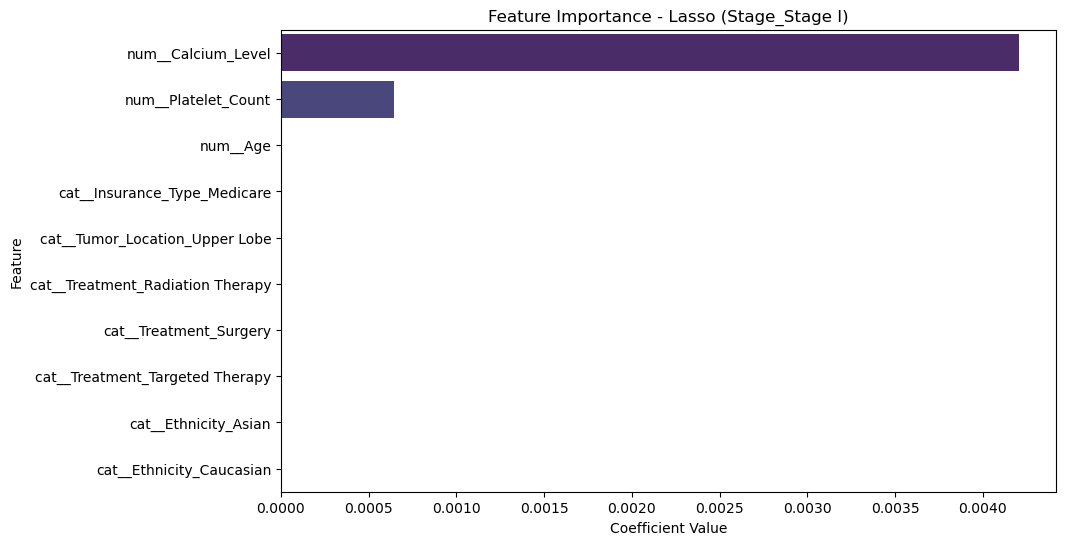

/var/folders/j1/83v578q91g933z2wfdhrd7k80000gn/T/ipykernel_22222/2645201311.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Coefficient", y="Feature", data=coef_df[:10], palette="viridis")  # Top 10 features


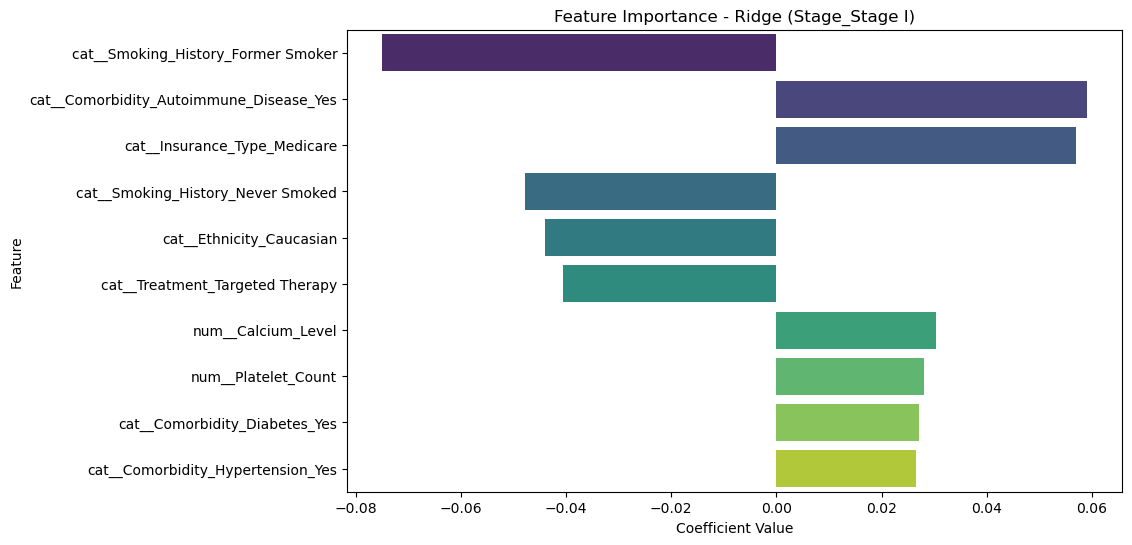

/var/folders/j1/83v578q91g933z2wfdhrd7k80000gn/T/ipykernel_22222/2645201311.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Coefficient", y="Feature", data=coef_df[:10], palette="viridis")  # Top 10 features


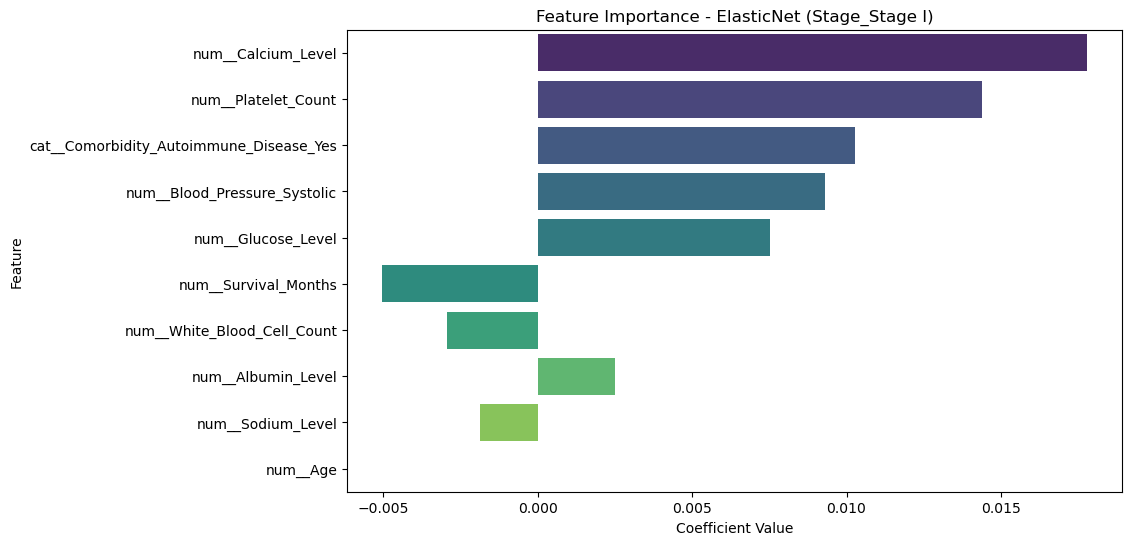

/var/folders/j1/83v578q91g933z2wfdhrd7k80000gn/T/ipykernel_22222/2645201311.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Coefficient", y="Feature", data=coef_df[:10], palette="viridis")  # Top 10 features


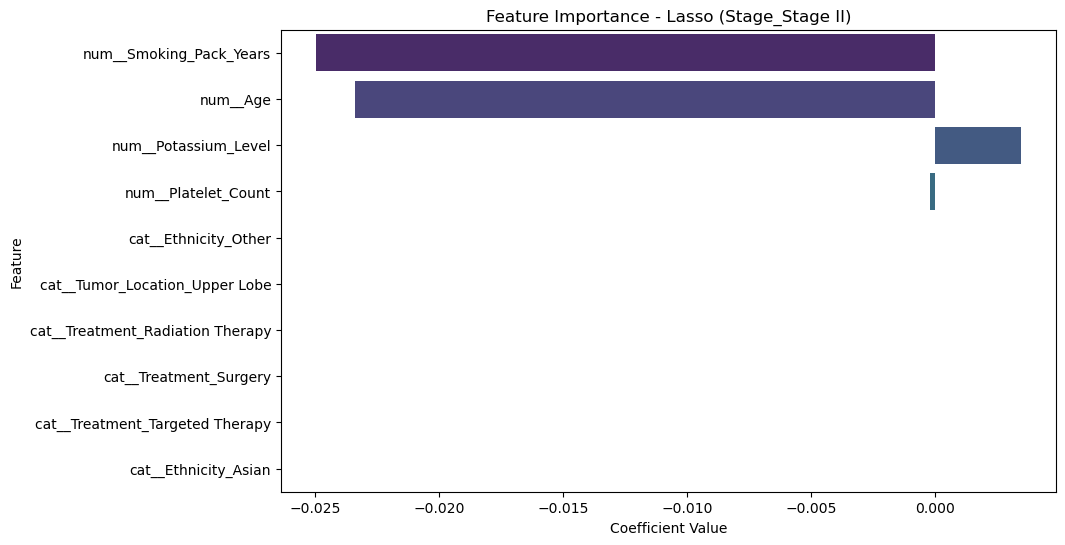

/var/folders/j1/83v578q91g933z2wfdhrd7k80000gn/T/ipykernel_22222/2645201311.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Coefficient", y="Feature", data=coef_df[:10], palette="viridis")  # Top 10 features


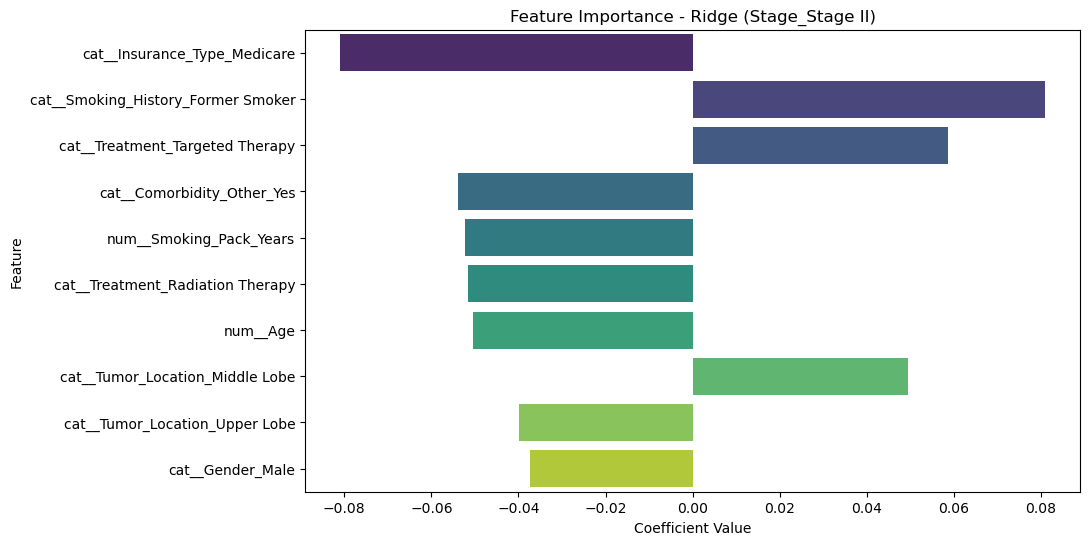

/var/folders/j1/83v578q91g933z2wfdhrd7k80000gn/T/ipykernel_22222/2645201311.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Coefficient", y="Feature", data=coef_df[:10], palette="viridis")  # Top 10 features


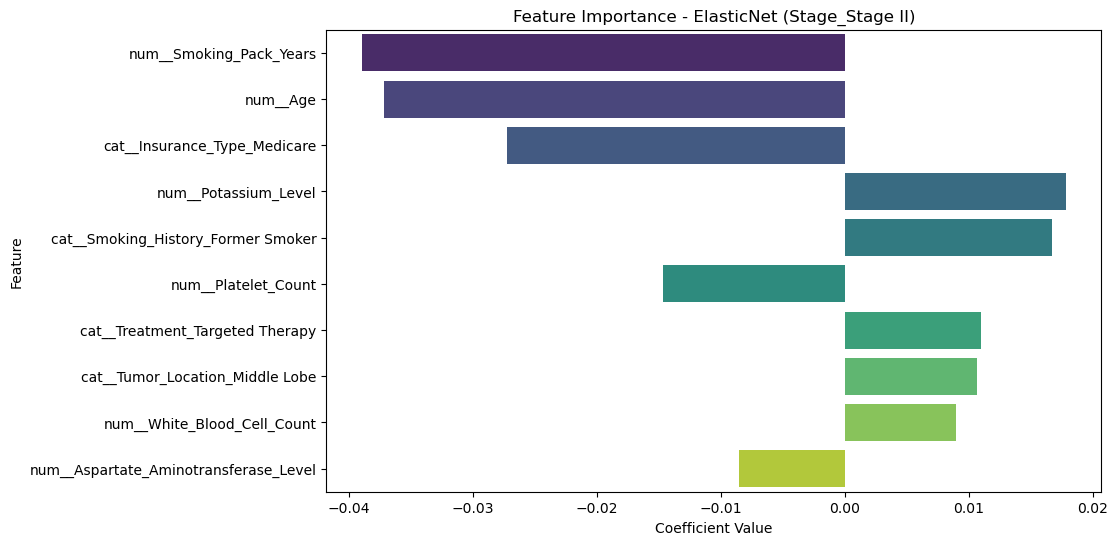

/var/folders/j1/83v578q91g933z2wfdhrd7k80000gn/T/ipykernel_22222/2645201311.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Coefficient", y="Feature", data=coef_df[:10], palette="viridis")  # Top 10 features


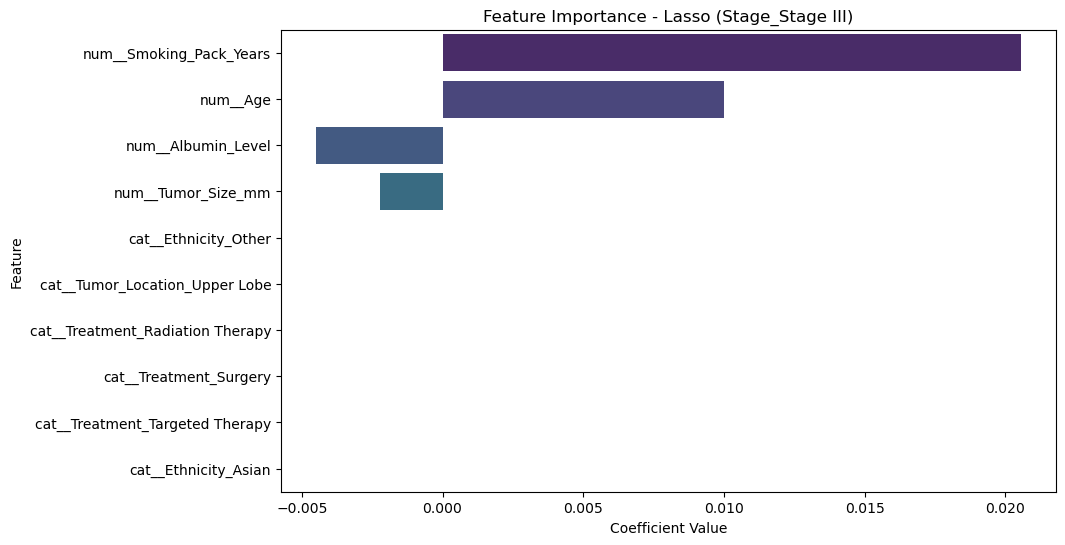

/var/folders/j1/83v578q91g933z2wfdhrd7k80000gn/T/ipykernel_22222/2645201311.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Coefficient", y="Feature", data=coef_df[:10], palette="viridis")  # Top 10 features


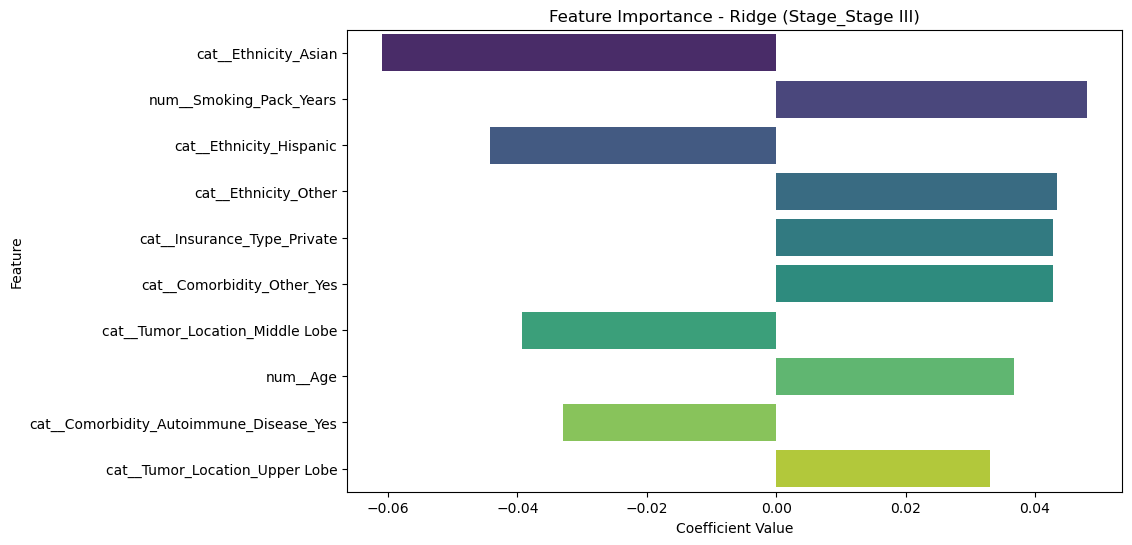

/var/folders/j1/83v578q91g933z2wfdhrd7k80000gn/T/ipykernel_22222/2645201311.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Coefficient", y="Feature", data=coef_df[:10], palette="viridis")  # Top 10 features


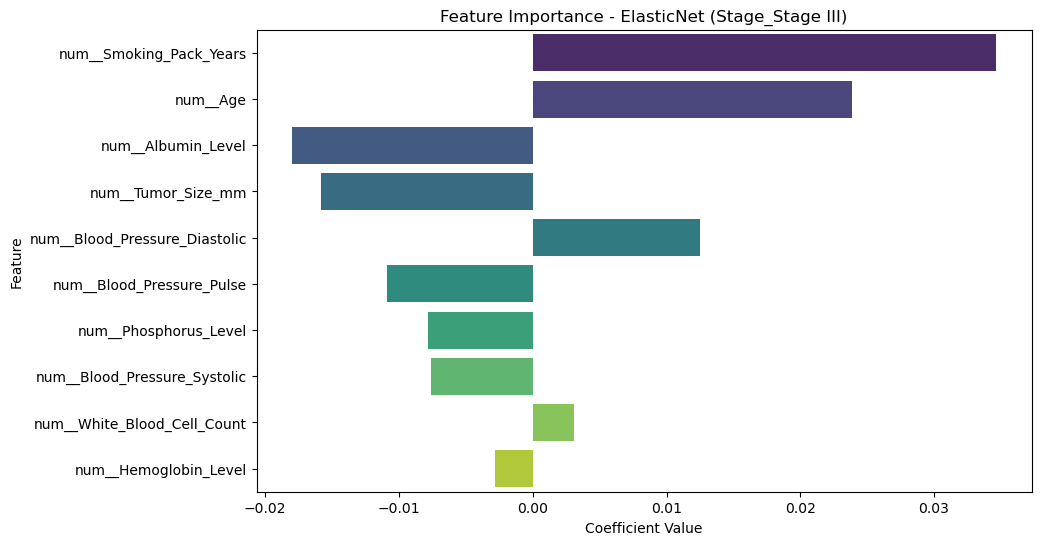

/var/folders/j1/83v578q91g933z2wfdhrd7k80000gn/T/ipykernel_22222/2645201311.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Coefficient", y="Feature", data=coef_df[:10], palette="viridis")  # Top 10 features


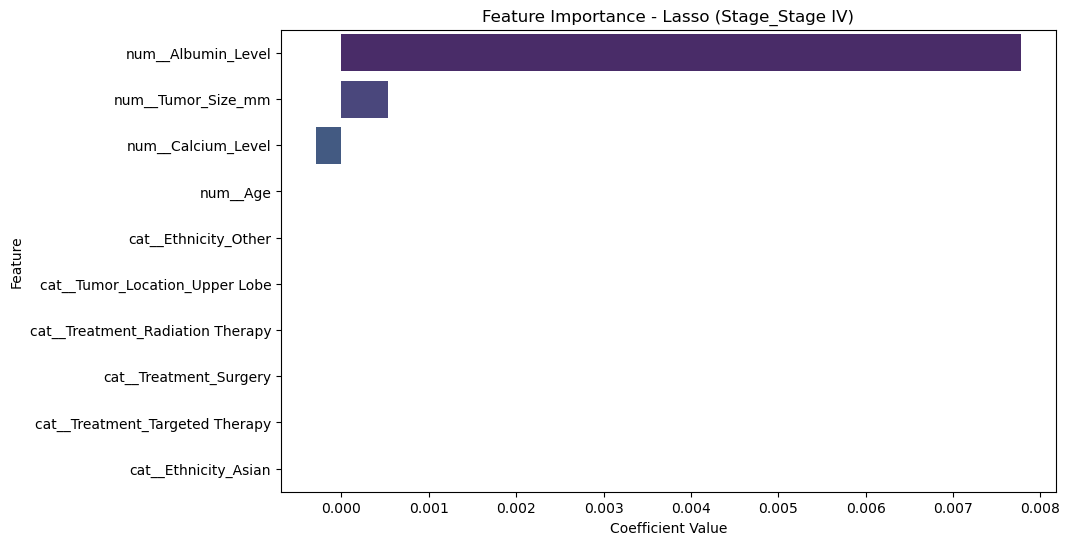

/var/folders/j1/83v578q91g933z2wfdhrd7k80000gn/T/ipykernel_22222/2645201311.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Coefficient", y="Feature", data=coef_df[:10], palette="viridis")  # Top 10 features


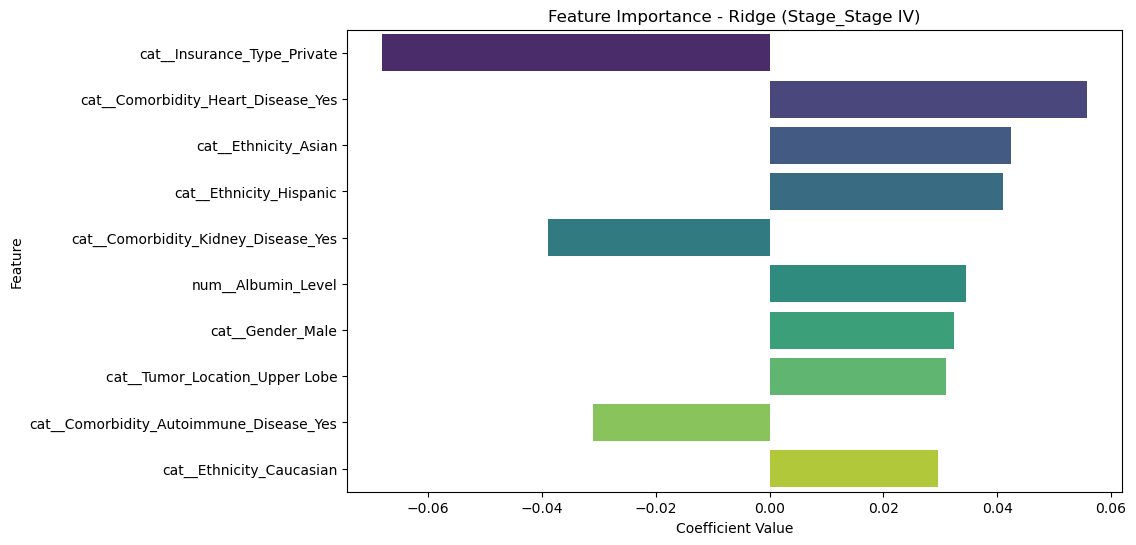

/var/folders/j1/83v578q91g933z2wfdhrd7k80000gn/T/ipykernel_22222/2645201311.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Coefficient", y="Feature", data=coef_df[:10], palette="viridis")  # Top 10 features


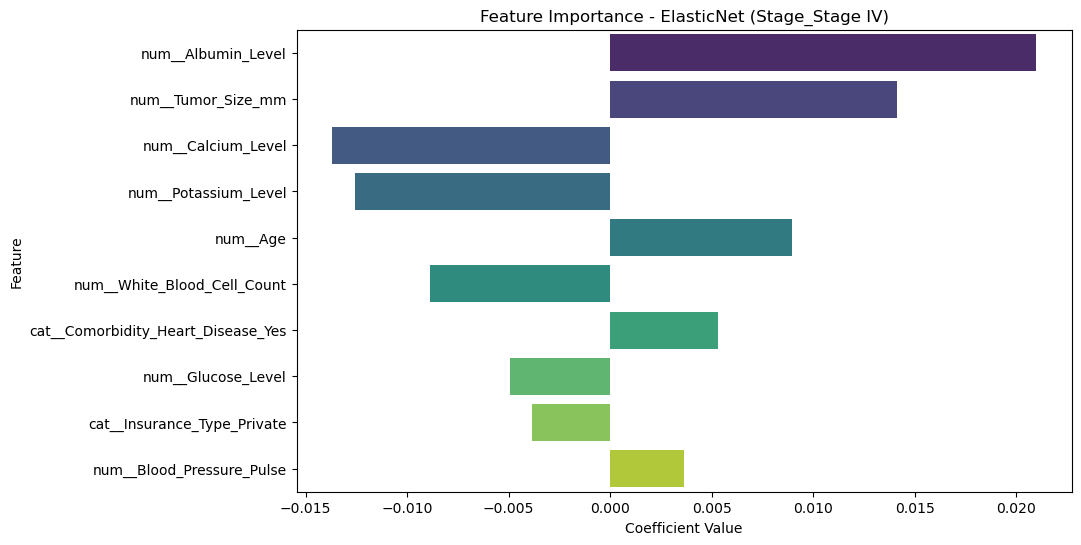

In [15]:
# Function to plot feature importance
def plot_feature_importance(model, stage, model_name):
    coef = model.coef_.flatten()
    
    # Create DataFrame with feature names and coefficients
    coef_df = pd.DataFrame({"Feature": feature_names, "Coefficient": coef})
    
    # Sort by absolute value of coefficients
    coef_df = coef_df.reindex(coef_df["Coefficient"].abs().sort_values(ascending=False).index)
    
    # Plot
    plt.figure(figsize=(10, 6))
    sns.barplot(x="Coefficient", y="Feature", data=coef_df[:10], palette="viridis")  # Top 10 features
    plt.title(f"Feature Importance - {model_name} ({stage})")
    plt.xlabel("Coefficient Value")
    plt.ylabel("Feature")
    plt.show()

# Loop through each stage and each model to visualize feature importance
for stage in results:
    for model_name, model in results[stage].items():
        plot_feature_importance(model, stage, model_name)

/var/folders/j1/83v578q91g933z2wfdhrd7k80000gn/T/ipykernel_22222/3498941065.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Coefficient", y="Feature", data=coef_df[:10], palette="viridis")  # Top 10 features


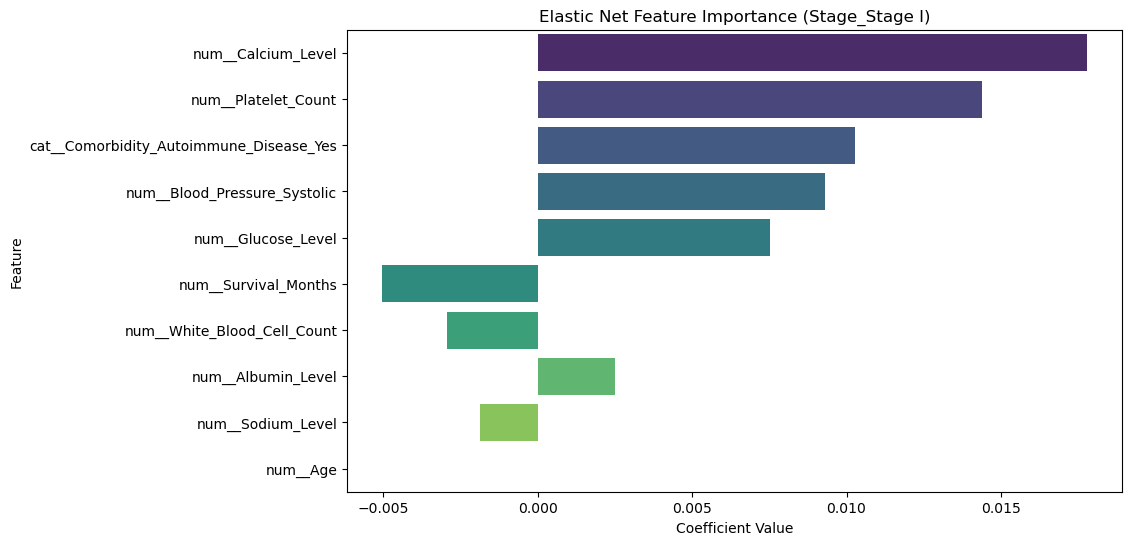

/var/folders/j1/83v578q91g933z2wfdhrd7k80000gn/T/ipykernel_22222/3498941065.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Coefficient", y="Feature", data=coef_df[:10], palette="viridis")  # Top 10 features


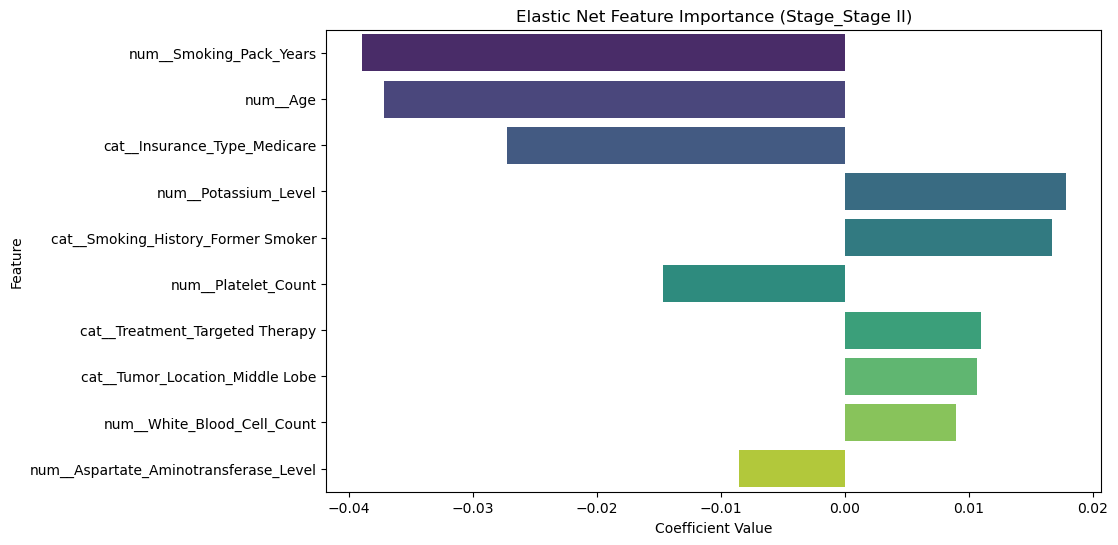

/var/folders/j1/83v578q91g933z2wfdhrd7k80000gn/T/ipykernel_22222/3498941065.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Coefficient", y="Feature", data=coef_df[:10], palette="viridis")  # Top 10 features


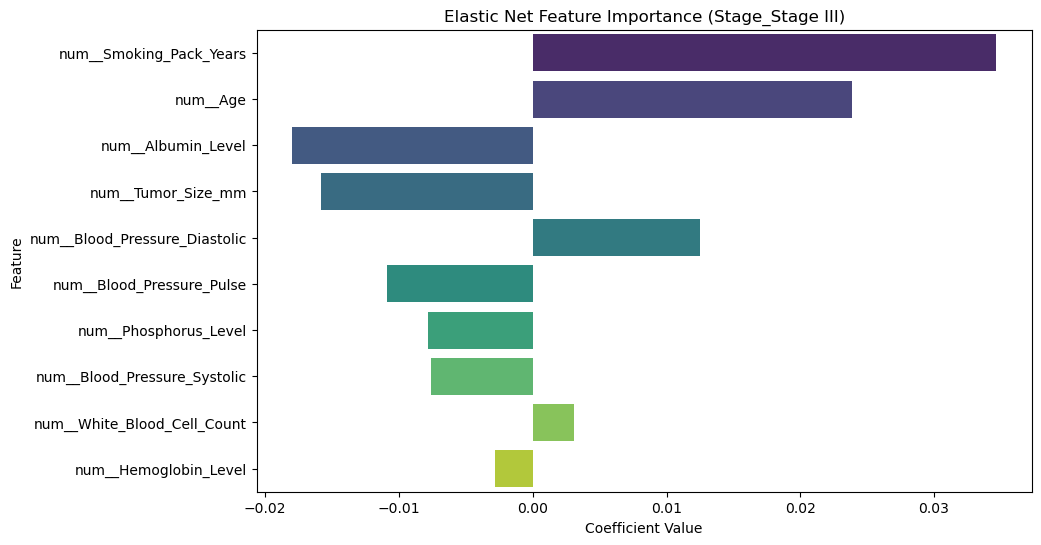

/var/folders/j1/83v578q91g933z2wfdhrd7k80000gn/T/ipykernel_22222/3498941065.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Coefficient", y="Feature", data=coef_df[:10], palette="viridis")  # Top 10 features


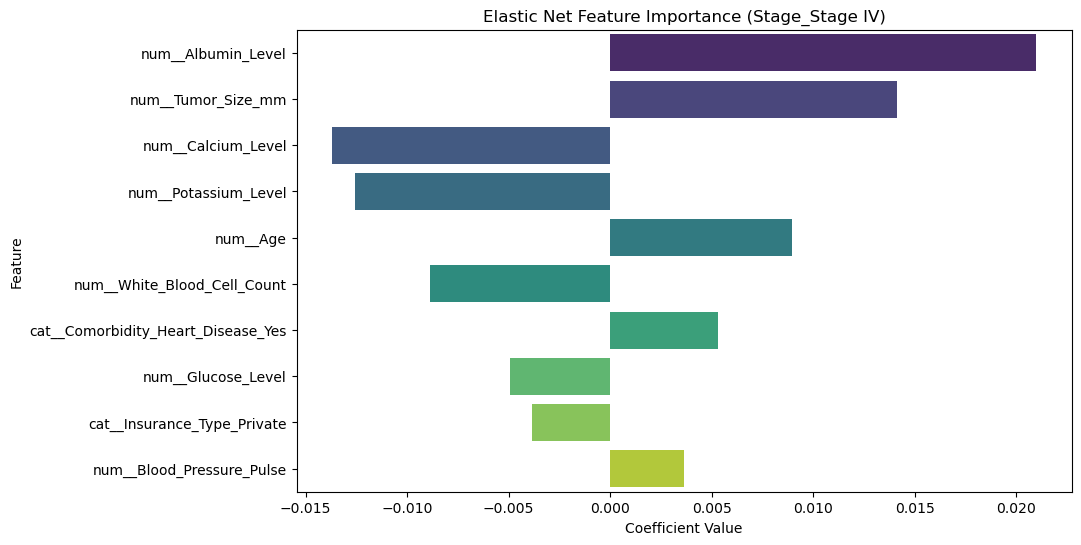

In [16]:
# Function to plot feature importance for Elastic Net
def plot_elastic_net_feature_importance(model, stage):
    coef = model.coef_.flatten()
    
    # Create DataFrame with feature names and coefficients
    coef_df = pd.DataFrame({"Feature": feature_names, "Coefficient": coef})
    
    # Sort by absolute value of coefficients
    coef_df = coef_df.reindex(coef_df["Coefficient"].abs().sort_values(ascending=False).index)
    
    # Plot
    plt.figure(figsize=(10, 6))
    sns.barplot(x="Coefficient", y="Feature", data=coef_df[:10], palette="viridis")  # Top 10 features
    plt.title(f"Elastic Net Feature Importance ({stage})")
    plt.xlabel("Coefficient Value")
    plt.ylabel("Feature")
    plt.show()

# Loop through each stage and plot feature importance for Elastic Net
for stage in results:
    plot_elastic_net_feature_importance(results[stage]["ElasticNet"], stage)

In [17]:
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Define Elastic Net model with Cross-Validation (CV)
elastic_net_cv = LogisticRegressionCV(
    penalty="elasticnet",
    solver="saga",
    cv=5,  # 5-Fold Cross-Validation
    max_iter=5000,
    l1_ratios=[0.1, 0.5, 0.9],  # Grid search over l1_ratio (Elastic Net balance)
    Cs=10,  # 10 values of C (inverse of regularization strength)
    scoring="f1",
    n_jobs=-1
)

# Dictionary to store results
elastic_net_results = {}

In [18]:
# Train Elastic Net CV for each stage (One-vs-All classification)
for stage in y_train.columns:
    print(f"\nTraining Elastic Net CV for {stage}...")

    # Train the model
    elastic_net_cv.fit(X_train, y_train[stage])

    # Best model from CV
    best_model = elastic_net_cv

    # Store best model
    elastic_net_results[stage] = best_model

    # Predictions on training & test sets
    y_train_pred = best_model.predict(X_train)
    y_test_pred = best_model.predict(X_test)

    # Compute metrics for training & test sets
    metrics = {
        "Train Accuracy": accuracy_score(y_train[stage], y_train_pred),
        "Test Accuracy": accuracy_score(y_test[stage], y_test_pred),
        "Train Precision": precision_score(y_train[stage], y_train_pred),
        "Test Precision": precision_score(y_test[stage], y_test_pred),
        "Train Recall": recall_score(y_train[stage], y_train_pred),
        "Test Recall": recall_score(y_test[stage], y_test_pred),
        "Train F1-score": f1_score(y_train[stage], y_train_pred),
        "Test F1-score": f1_score(y_test[stage], y_test_pred),
    }

    # Print evaluation metrics
    print(f"\nElastic Net Performance for {stage}:")
    for metric, value in metrics.items():
        print(f"{metric}: {value:.4f}")


Training Elastic Net CV for Stage_Stage I...


/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



Elastic Net Performance for Stage_Stage I:
Train Accuracy: 0.7485
Test Accuracy: 0.7580
Train Precision: 0.0000
Test Precision: 0.0000
Train Recall: 0.0000
Test Recall: 0.0000
Train F1-score: 0.0000
Test F1-score: 0.0000

Training Elastic Net CV for Stage_Stage II...


/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



Elastic Net Performance for Stage_Stage II:
Train Accuracy: 0.7534
Test Accuracy: 0.7563
Train Precision: 0.0000
Test Precision: 0.0000
Train Recall: 0.0000
Test Recall: 0.0000
Train F1-score: 0.0000
Test F1-score: 0.0000

Training Elastic Net CV for Stage_Stage III...


/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



Elastic Net Performance for Stage_Stage III:
Train Accuracy: 0.7521
Test Accuracy: 0.7401
Train Precision: 0.0000
Test Precision: 0.0000
Train Recall: 0.0000
Test Recall: 0.0000
Train F1-score: 0.0000
Test F1-score: 0.0000

Training Elastic Net CV for Stage_Stage IV...

Elastic Net Performance for Stage_Stage IV:
Train Accuracy: 0.7460
Test Accuracy: 0.7456
Train Precision: 0.0000
Test Precision: 0.0000
Train Recall: 0.0000
Test Recall: 0.0000
Train F1-score: 0.0000
Test F1-score: 0.0000


/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [19]:
# Create a DataFrame to store model performance
metric_df = pd.DataFrame(columns=["Stage", "Train Accuracy", "Test Accuracy",
                                  "Train Precision", "Test Precision", 
                                  "Train Recall", "Test Recall", 
                                  "Train F1-score", "Test F1-score"])

# Collect results for each stage
for stage in elastic_net_results:
    best_model = elastic_net_results[stage]
    
    # Predictions on training & test sets
    y_train_pred = best_model.predict(X_train)
    y_test_pred = best_model.predict(X_test)
    
    # Compute metrics
    metrics = {
        "Stage": stage,
        "Train Accuracy": accuracy_score(y_train[stage], y_train_pred),
        "Test Accuracy": accuracy_score(y_test[stage], y_test_pred),
        "Train Precision": precision_score(y_train[stage], y_train_pred),
        "Test Precision": precision_score(y_test[stage], y_test_pred),
        "Train Recall": recall_score(y_train[stage], y_train_pred),
        "Test Recall": recall_score(y_test[stage], y_test_pred),
        "Train F1-score": f1_score(y_train[stage], y_train_pred),
        "Test F1-score": f1_score(y_test[stage], y_test_pred),
    }

    # Append to DataFrame
    metric_df = pd.concat([metric_df, pd.DataFrame([metrics])], ignore_index=True)

# Display the table
print("\nElastic Net Performance Metrics:")
print(metric_df.to_string(index=False))


Elastic Net Performance Metrics:
          Stage  Train Accuracy  Test Accuracy  Train Precision  Test Precision  Train Recall  Test Recall  Train F1-score  Test F1-score
  Stage_Stage I        0.748494       0.758030              0.0             0.0           0.0          0.0             0.0            0.0
 Stage_Stage II        0.753408       0.756340              0.0             0.0           0.0          0.0             0.0            0.0
Stage_Stage III        0.752087       0.740068              0.0             0.0           0.0          0.0             0.0            0.0
 Stage_Stage IV        0.746011       0.745562              0.0             0.0           0.0          0.0             0.0            0.0


/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/var/folders/j1/83v578q91g933z2wfdhrd7k80000gn/T/ipykernel_22222/740122342.py:29: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation

In [20]:
import numpy as np
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve

# Function to find the best threshold dynamically
def find_best_threshold(y_true, y_prob):
    fpr, tpr, thresholds = roc_curve(y_true, y_prob)
    optimal_idx = np.argmax(tpr - fpr)  # Maximize True Positives & Minimize False Positives
    return thresholds[optimal_idx]

# Define Elastic Net with improved hyperparameter tuning
elastic_net_cv = LogisticRegressionCV(
    penalty="elasticnet",
    solver="saga",
    cv=5,
    max_iter=5000,
    l1_ratios=[0.1, 0.3, 0.5, 0.7, 0.9],  # More fine-grained tuning
    Cs=[0.0001, 0.001, 0.01, 0.1, 1, 10, 100],  # Expanded range
    scoring="f1",
    class_weight="balanced",  # Fix class imbalance
    n_jobs=-1
)

# Dictionary to store results
elastic_net_results = {}

# Store best thresholds per stage
best_thresholds = {}

# Train Elastic Net CV for each stage (One-vs-All classification)
for stage in y_train.columns:
    print(f"\nTraining Elastic Net CV for {stage}...")

    # Train the model
    elastic_net_cv.fit(X_train, y_train[stage])

    # Best model from CV
    best_model = elastic_net_cv

    # Store best model
    elastic_net_results[stage] = best_model

    # Get prediction probabilities
    y_test_prob = best_model.predict_proba(X_test)[:, 1]  # Probability for positive class

    # Find best threshold dynamically
    best_thresh = find_best_threshold(y_test[stage], y_test_prob)
    best_thresholds[stage] = best_thresh

    # Apply new threshold to predictions
    y_train_pred = (best_model.predict_proba(X_train)[:, 1] > best_thresh).astype(int)
    y_test_pred = (y_test_prob > best_thresh).astype(int)

    # Compute metrics
    metrics = {
        "Stage": stage,
        "Train Accuracy": accuracy_score(y_train[stage], y_train_pred),
        "Test Accuracy": accuracy_score(y_test[stage], y_test_pred),
        "Train Precision": precision_score(y_train[stage], y_train_pred, zero_division=1),
        "Test Precision": precision_score(y_test[stage], y_test_pred, zero_division=1),
        "Train Recall": recall_score(y_train[stage], y_train_pred),
        "Test Recall": recall_score(y_test[stage], y_test_pred),
        "Train F1-score": f1_score(y_train[stage], y_train_pred),
        "Test F1-score": f1_score(y_test[stage], y_test_pred),
    }

    # Print evaluation metrics
    print(f"\nElastic Net Performance for {stage}:")
    for metric, value in metrics.items():
        if isinstance(value, (int, float)):
            print(f"{metric}: {value:.4f}")
        else:
            print(f"{metric}: {value}")

    # Check prediction distributions
    print(f"Predicted Positives in Test Set for {stage}: {sum(y_test_pred)}")
    print(f"Best Decision Threshold for {stage}: {best_thresh:.3f}")


Training Elastic Net CV for Stage_Stage I...

Elastic Net Performance for Stage_Stage I:
Stage: Stage_Stage I
Train Accuracy: 0.6672
Test Accuracy: 0.6735
Train Precision: 0.2646
Test Precision: 0.2543
Train Recall: 0.1817
Test Recall: 0.1808
Train F1-score: 0.2155
Test F1-score: 0.2113
Predicted Positives in Test Set for Stage_Stage I: 814
Best Decision Threshold for Stage_Stage I: 0.503

Training Elastic Net CV for Stage_Stage II...

Elastic Net Performance for Stage_Stage II:
Stage: Stage_Stage II
Train Accuracy: 0.7234
Test Accuracy: 0.7223
Train Precision: 0.2671
Test Precision: 0.2523
Train Recall: 0.0696
Test Recall: 0.0711
Train F1-score: 0.1105
Test F1-score: 0.1110
Predicted Positives in Test Set for Stage_Stage II: 325
Best Decision Threshold for Stage_Stage II: 0.515

Training Elastic Net CV for Stage_Stage III...

Elastic Net Performance for Stage_Stage III:
Stage: Stage_Stage III
Train Accuracy: 0.6921
Test Accuracy: 0.6762
Train Precision: 0.2723
Test Precision: 0.2684


In [21]:
# Train Lasso (L1) Logistic Regression with Cross-Validation
lasso_cv = LogisticRegressionCV(
    penalty="l1",
    solver="saga",
    cv=5,
    max_iter=5000,
    Cs=[0.0001, 0.001, 0.01, 0.1, 1, 10, 100],  # Expanded range for better tuning
    scoring="f1",
    class_weight="balanced",
    n_jobs=-1
)

# Store Lasso results
lasso_results = {}
lasso_thresholds = {}

for stage in y_train.columns:
    print(f"\nTraining Lasso Regression CV for {stage}...")

    # Train Lasso model
    lasso_cv.fit(X_train, y_train[stage])
    best_model = lasso_cv

    # Store best model
    lasso_results[stage] = best_model

    # Get test probabilities
    y_test_prob = best_model.predict_proba(X_test)[:, 1]

    # Find best threshold
    best_thresh = find_best_threshold(y_test[stage], y_test_prob)
    lasso_thresholds[stage] = best_thresh

    # Apply new threshold
    y_train_pred = (best_model.predict_proba(X_train)[:, 1] > best_thresh).astype(int)
    y_test_pred = (y_test_prob > best_thresh).astype(int)

    # Compute performance metrics
    metrics = {
        "Stage": stage,
        "Train Accuracy": accuracy_score(y_train[stage], y_train_pred),
        "Test Accuracy": accuracy_score(y_test[stage], y_test_pred),
        "Train Precision": precision_score(y_train[stage], y_train_pred, zero_division=1),
        "Test Precision": precision_score(y_test[stage], y_test_pred, zero_division=1),
        "Train Recall": recall_score(y_train[stage], y_train_pred),
        "Test Recall": recall_score(y_test[stage], y_test_pred),
        "Train F1-score": f1_score(y_train[stage], y_train_pred),
        "Test F1-score": f1_score(y_test[stage], y_test_pred),
    }

    # Print results
    print(f"\nLasso Regression Performance for {stage}:")
    for metric, value in metrics.items():
        if isinstance(value, (int, float)):
            print(f"{metric}: {value:.4f}")
        else:
            print(f"{metric}: {value}")

    print(f"Best Decision Threshold for {stage}: {best_thresh:.3f}")


Training Lasso Regression CV for Stage_Stage I...

Lasso Regression Performance for Stage_Stage I:
Stage: Stage_Stage I
Train Accuracy: 0.6702
Test Accuracy: 0.6765
Train Precision: 0.2654
Test Precision: 0.2545
Train Recall: 0.1761
Test Recall: 0.1747
Train F1-score: 0.2117
Test F1-score: 0.2071
Best Decision Threshold for Stage_Stage I: 0.503

Training Lasso Regression CV for Stage_Stage II...

Lasso Regression Performance for Stage_Stage II:
Stage: Stage_Stage II
Train Accuracy: 0.7238
Test Accuracy: 0.7225
Train Precision: 0.2686
Test Precision: 0.2531
Train Recall: 0.0696
Test Recall: 0.0711
Train F1-score: 0.1106
Test F1-score: 0.1110
Best Decision Threshold for Stage_Stage II: 0.518

Training Lasso Regression CV for Stage_Stage III...

Lasso Regression Performance for Stage_Stage III:
Stage: Stage_Stage III
Train Accuracy: 0.5715
Test Accuracy: 0.5524
Train Precision: 0.2670
Test Precision: 0.2651
Train Recall: 0.4173
Test Recall: 0.4073
Train F1-score: 0.3256
Test F1-score: 0.

In [22]:
# Train Ridge (L2) Logistic Regression with Cross-Validation
ridge_cv = LogisticRegressionCV(
    penalty="l2",
    solver="saga",
    cv=5,
    max_iter=5000,
    Cs=[0.0001, 0.001, 0.01, 0.1, 1, 10, 100],  # Expanded range for better tuning
    scoring="f1",
    class_weight="balanced",
    n_jobs=-1
)

# Store Ridge results
ridge_results = {}
ridge_thresholds = {}

for stage in y_train.columns:
    print(f"\nTraining Ridge Regression CV for {stage}...")

    # Train Ridge model
    ridge_cv.fit(X_train, y_train[stage])
    best_model = ridge_cv

    # Store best model
    ridge_results[stage] = best_model

    # Get test probabilities
    y_test_prob = best_model.predict_proba(X_test)[:, 1]

    # Find best threshold
    best_thresh = find_best_threshold(y_test[stage], y_test_prob)
    ridge_thresholds[stage] = best_thresh

    # Apply new threshold
    y_train_pred = (best_model.predict_proba(X_train)[:, 1] > best_thresh).astype(int)
    y_test_pred = (y_test_prob > best_thresh).astype(int)

    # Compute performance metrics
    metrics = {
        "Stage": stage,
        "Train Accuracy": accuracy_score(y_train[stage], y_train_pred),
        "Test Accuracy": accuracy_score(y_test[stage], y_test_pred),
        "Train Precision": precision_score(y_train[stage], y_train_pred, zero_division=1),
        "Test Precision": precision_score(y_test[stage], y_test_pred, zero_division=1),
        "Train Recall": recall_score(y_train[stage], y_train_pred),
        "Test Recall": recall_score(y_test[stage], y_test_pred),
        "Train F1-score": f1_score(y_train[stage], y_train_pred),
        "Test F1-score": f1_score(y_test[stage], y_test_pred),
    }

    # Print results
    print(f"\nRidge Regression Performance for {stage}:")
    for metric, value in metrics.items():
        if isinstance(value, (int, float)):
            print(f"{metric}: {value:.4f}")
        else:
            print(f"{metric}: {value}")

    print(f"Best Decision Threshold for {stage}: {best_thresh:.3f}")


Training Ridge Regression CV for Stage_Stage I...

Ridge Regression Performance for Stage_Stage I:
Stage: Stage_Stage I
Train Accuracy: 0.4049
Test Accuracy: 0.3935
Train Precision: 0.2617
Test Precision: 0.2496
Train Recall: 0.7500
Test Recall: 0.7511
Train F1-score: 0.3880
Test F1-score: 0.3747
Best Decision Threshold for Stage_Stage I: 0.484

Training Ridge Regression CV for Stage_Stage II...

Ridge Regression Performance for Stage_Stage II:
Stage: Stage_Stage II
Train Accuracy: 0.2513
Test Accuracy: 0.2487
Train Precision: 0.2471
Test Precision: 0.2445
Train Recall: 0.9951
Test Recall: 0.9965
Train F1-score: 0.3959
Test F1-score: 0.3926
Best Decision Threshold for Stage_Stage II: 0.479

Training Ridge Regression CV for Stage_Stage III...

Ridge Regression Performance for Stage_Stage III:
Stage: Stage_Stage III
Train Accuracy: 0.2609
Test Accuracy: 0.2694
Train Precision: 0.2492
Test Precision: 0.2602
Train Recall: 0.9840
Test Recall: 0.9821
Train F1-score: 0.3976
Test F1-score: 0.

In [23]:
# Create a DataFrame to store all results
comparison_df = pd.DataFrame(columns=["Model", "Stage", "Train Accuracy", "Test Accuracy",
                                      "Train Precision", "Test Precision",
                                      "Train Recall", "Test Recall",
                                      "Train F1-score", "Test F1-score"])

# Function to collect metrics
def collect_metrics(model_results, model_name):
    global comparison_df
    for stage in y_train.columns:
        best_model = model_results[stage]

        # Get test probabilities and apply best threshold
        y_test_prob = best_model.predict_proba(X_test)[:, 1]
        best_thresh = best_thresholds[stage] if model_name == "ElasticNet" else (
            lasso_thresholds[stage] if model_name == "Lasso" else ridge_thresholds[stage]
        )

        y_train_pred = (best_model.predict_proba(X_train)[:, 1] > best_thresh).astype(int)
        y_test_pred = (y_test_prob > best_thresh).astype(int)

        # Compute metrics
        metrics = {
            "Model": model_name,
            "Stage": stage,
            "Train Accuracy": accuracy_score(y_train[stage], y_train_pred),
            "Test Accuracy": accuracy_score(y_test[stage], y_test_pred),
            "Train Precision": precision_score(y_train[stage], y_train_pred, zero_division=1),
            "Test Precision": precision_score(y_test[stage], y_test_pred, zero_division=1),
            "Train Recall": recall_score(y_train[stage], y_train_pred),
            "Test Recall": recall_score(y_test[stage], y_test_pred),
            "Train F1-score": f1_score(y_train[stage], y_train_pred),
            "Test F1-score": f1_score(y_test[stage], y_test_pred),
        }

        # Append to DataFrame
        comparison_df = pd.concat([comparison_df, pd.DataFrame([metrics])], ignore_index=True)

# Collect metrics for all models
collect_metrics(elastic_net_results, "ElasticNet")
collect_metrics(lasso_results, "Lasso")
collect_metrics(ridge_results, "Ridge")

# Display comparison table
print("\nComparison of Elastic Net, Lasso, and Ridge Models:")
print(comparison_df.to_string(index=False))

/var/folders/j1/83v578q91g933z2wfdhrd7k80000gn/T/ipykernel_22222/1034460135.py:37: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  comparison_df = pd.concat([comparison_df, pd.DataFrame([metrics])], ignore_index=True)



Comparison of Elastic Net, Lasso, and Ridge Models:
     Model           Stage  Train Accuracy  Test Accuracy  Train Precision  Test Precision  Train Recall  Test Recall  Train F1-score  Test F1-score
ElasticNet   Stage_Stage I        0.569058       0.576923         0.250734        0.243873      0.358824     0.356332        0.295195       0.289567
ElasticNet  Stage_Stage II        0.736289       0.741758         0.219723        0.232558      0.027212     0.026019        0.048427       0.046802
ElasticNet Stage_Stage III        0.732220       0.726331         0.240331        0.298137      0.037084     0.039024        0.064254       0.069015
ElasticNet  Stage_Stage IV        0.298901       0.296915         0.256195        0.256145      0.924901     0.926080        0.401245       0.401296
     Lasso   Stage_Stage I        0.631935       0.640955         0.253795        0.239662      0.238866     0.222707        0.246104       0.230874
     Lasso  Stage_Stage II        0.753408       0.75

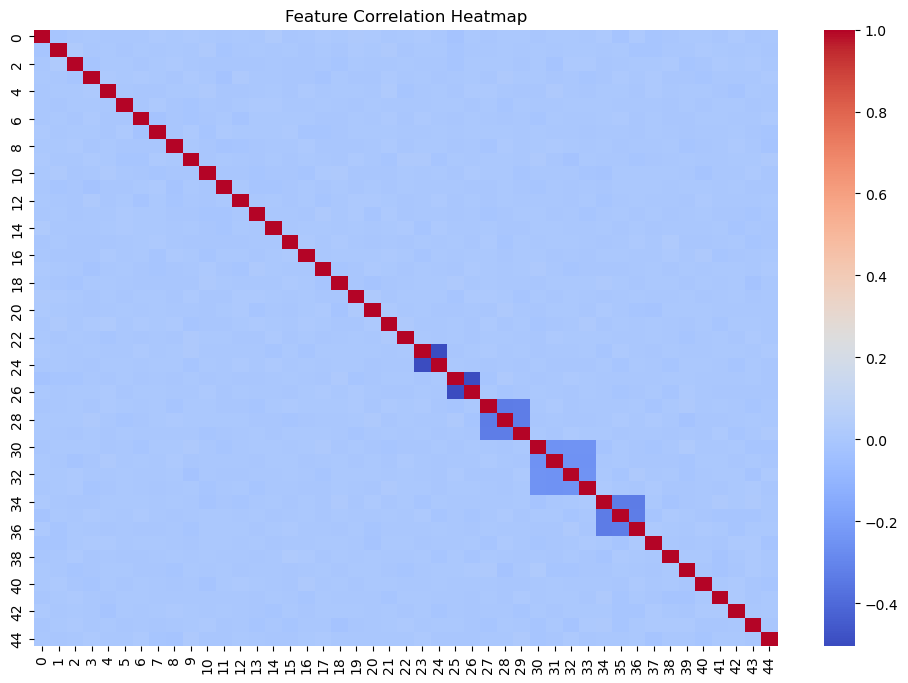

In [61]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Compute correlation matrix
correlation_matrix = pd.DataFrame(X_train).corr()

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, cmap="coolwarm", annot=False)
plt.title("Feature Correlation Heatmap")
plt.show()

In [69]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# Define Elastic Net model
elastic_net = LogisticRegression(
    penalty="elasticnet",
    solver="saga",
    max_iter=10000,
    class_weight="balanced"
)

# Define hyperparameter grid
param_grid = {
    "C": np.logspace(-3, 3, 15),  # Wider range of regularization strength
    "l1_ratio": np.linspace(0.05, 0.95, 10)  # More fine-grained L1/L2 mixing
}

# Dictionary to store retrained results
retrained_results = {}
retrained_thresholds = {}

# Train Elastic Net for each stage
for stage in y_train.columns:
    print(f"\n🔍 Retraining Elastic Net for {stage}...")

    # Grid Search with Cross-Validation
    grid_search = GridSearchCV(elastic_net, param_grid, cv=5, scoring="f1", n_jobs=-1)
    grid_search.fit(X_train, y_train[stage])

    # Get best model
    best_model = grid_search.best_estimator_

    # Store best model
    retrained_results[stage] = best_model

    # Get test probabilities
    y_test_prob = best_model.predict_proba(X_test)[:, 1]

    # Apply a dynamic threshold
    best_thresh = find_best_threshold(y_test[stage], y_test_prob)
    retrained_thresholds[stage] = best_thresh

    # Apply optimized threshold
    y_train_pred = (best_model.predict_proba(X_train)[:, 1] > best_thresh).astype(int)
    y_test_pred = (y_test_prob > best_thresh).astype(int)

    # Print evaluation metrics
    print(f"\n✅ Retrained Elastic Net Performance for {stage}:")
    print(f"Train Accuracy: {accuracy_score(y_train[stage], y_train_pred):.4f}")
    print(f"Test Accuracy: {accuracy_score(y_test[stage], y_test_pred):.4f}")
    print(f"Train Precision: {precision_score(y_train[stage], y_train_pred, zero_division=1):.4f}")
    print(f"Test Precision: {precision_score(y_test[stage], y_test_pred, zero_division=1):.4f}")
    print(f"Train Recall: {recall_score(y_train[stage], y_train_pred):.4f}")
    print(f"Test Recall: {recall_score(y_test[stage], y_test_pred):.4f}")
    print(f"Train F1-score: {f1_score(y_train[stage], y_train_pred):.4f}")
    print(f"Test F1-score: {f1_score(y_test[stage], y_test_pred):.4f}")

    # Show the best hyperparameters found
    print(f"🔹 Best C: {grid_search.best_params_['C']}, Best l1_ratio: {grid_search.best_params_['l1_ratio']}")
    print(f"🔹 Best Decision Threshold for {stage}: {best_thresh:.3f}")



🔍 Retraining Elastic Net for Stage_Stage I...

✅ Retrained Elastic Net Performance for Stage_Stage I:
Train Accuracy: 0.3589
Test Accuracy: 0.3506
Train Precision: 0.2553
Test Precision: 0.2456
Train Recall: 0.8082
Test Recall: 0.8131
Train F1-score: 0.3881
Test F1-score: 0.3773
🔹 Best C: 0.0071968567300115215, Best l1_ratio: 0.85
🔹 Best Decision Threshold for Stage_Stage I: 0.498

🔍 Retraining Elastic Net for Stage_Stage II...

✅ Retrained Elastic Net Performance for Stage_Stage II:
Train Accuracy: 0.7165
Test Accuracy: 0.7198
Train Precision: 0.2504
Test Precision: 0.2536
Train Recall: 0.0750
Test Recall: 0.0772
Train F1-score: 0.1154
Test F1-score: 0.1184
🔹 Best C: 0.0026826957952797246, Best l1_ratio: 0.5499999999999999
🔹 Best Decision Threshold for Stage_Stage II: 0.505

🔍 Retraining Elastic Net for Stage_Stage III...

✅ Retrained Elastic Net Performance for Stage_Stage III:
Train Accuracy: 0.6877
Test Accuracy: 0.6701
Train Precision: 0.2733
Test Precision: 0.2692
Train Recall: 

In [25]:
import matplotlib.pyplot as plt
import numpy as np

# Define stages (replace with actual stage names)
stages = list(retrained_results.keys())

# Define metric names
metrics = ["Accuracy", "Precision", "Recall", "F1-score"]

# Initialize lists for scores
train_scores = []
test_scores = []

# Collect train and test scores for each stage
for stage in stages:
    # Get predictions using the best model and threshold
    y_train_pred = (retrained_results[stage].predict_proba(X_train)[:, 1] > retrained_thresholds[stage]).astype(int)
    y_test_pred = (retrained_results[stage].predict_proba(X_test)[:, 1] > retrained_thresholds[stage]).astype(int)

    # Compute metrics
    train_scores.append([
        accuracy_score(y_train[stage], y_train_pred),
        precision_score(y_train[stage], y_train_pred, zero_division=1),
        recall_score(y_train[stage], y_train_pred),
        f1_score(y_train[stage], y_train_pred)
    ])
    test_scores.append([
        accuracy_score(y_test[stage], y_test_pred),
        precision_score(y_test[stage], y_test_pred, zero_division=1),
        recall_score(y_test[stage], y_test_pred),
        f1_score(y_test[stage], y_test_pred)
    ])

# Convert to numpy arrays
train_scores = np.array(train_scores)
test_scores = np.array(test_scores)

# Set bar width and positions
x = np.arange(len(stages))
bar_width = 0.4

# Plot bar charts for each metric
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.ravel()

for i, metric in enumerate(metrics):
    axes[i].bar(x - bar_width/2, train_scores[:, i], bar_width, label='Train', color='blue', alpha=0.7)
    axes[i].bar(x + bar_width/2, test_scores[:, i], bar_width, label='Test', color='orange', alpha=0.7)
    axes[i].set_title(f"Elastic Net {metric} Across Stages")
    axes[i].set_xticks(x)
    axes[i].set_xticklabels(stages, rotation=45)
    axes[i].set_ylabel(metric)
    axes[i].legend()

plt.tight_layout()
plt.show()

NameError: name 'retrained_results' is not defined